In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# import argparse

import pandas as pd
import json
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from liblinear.liblinearutil import train, problem,parameter,save_model, load_model
from liblinear.liblinearutil import predict as pred
from scipy.sparse import hstack


In [3]:
df = pd.read_csv('../corpus/dataset.csv')
df['sentence']=df['sentence'].values.astype('U')
print(len(df))

X = df['sentence']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)
df_test = pd.concat([X_test, y_test], axis=1)
df_2 = pd.concat([X_train, y_train], axis=1)


773034


In [13]:
df_test.to_csv('df_test.csv', index=False)
df_2.to_csv('df_train.csv', index=False)

In [4]:
X = df_2['sentence']
y=df_2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [5]:
class CustomModel():
    def __init__(self, c_gram_range=(1, 1), C=1.0, w_gram_range=(1,1), s=2,  max_features=20000):
        self.c_gram_range = c_gram_range
        self.w_gram_range = w_gram_range
        self.s = s
        self.C = C
        self.max_features = max_features
        self.word_vectorizer=None
        self.m = None
        self.char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=self.c_gram_range, lowercase=False,max_features= self.max_features )
        if w_gram_range:
            self.word_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=self.w_gram_range, lowercase=False,max_features= self.max_features )
    def fit(self, X, y):
        # Tokenize and vectorize the input data


        X_char_transformed = self.char_vectorizer.fit_transform(X)
        if self.word_vectorizer:
            X_word_transformed = self.word_vectorizer.fit_transform(X)
            X_train_combined = hstack([X_char_transformed, X_word_transformed])
            prob  = problem(y.values, X_train_combined)
        else:
            prob  = problem(y.values, X_char_transformed)


        self.m = train(prob, parameter(f'-s {self.s} -c {self.C}'))
        return self

    def transform(self, X):
        # Tokenize and vectorize the input data
        X_char_transformed = self.char_vectorizer.transform(X)
        if self.word_vectorizer:
            X_word_transformed = self.word_vectorizer.fit_transform(X)
            X_train_combined = hstack([X_char_transformed, X_word_transformed])
            return X_train_combined
        else:
            return X_char_transformed

    def predict(self, X):
        # Tokenize and vectorize the input data, then make predictions

        # Input validation
        X_transformed = self.transform(X)
        p_label1, p_acc, p_val = pred([], X_transformed, self.m)
        return [int(x) for x in p_label1]
    def find_best_c(self, X,y):
        X_char_transformed = self.char_vectorizer.fit_transform(X)
        if self.word_vectorizer:
            X_word_transformed = self.word_vectorizer.fit_transform(X)
            X_train_combined = hstack([X_char_transformed, X_word_transformed])
            prob  = problem(y.values, X_train_combined)
        else:
            prob  = problem(y.values, X_char_transformed)


        best_C, best_p, best_rate  = train(prob, parameter(f'-s {self.s} -C'))
        return best_C

In [6]:

custom_model4 = CustomModel(c_gram_range=(1, 6), C=0.25, w_gram_range=None, s=2,  max_features=None)


In [7]:
custom_model4.fit(X_train, y_train)
df_test
# Make predictions on the test data
y_pred = custom_model4.predict(df_test['sentence'].values)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(df_test['class'].values, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')

init f 1.928e+05 |g| 4.638e+04
iter  1 f 4.809e+04 |g| 6.136e+03 CG   2 step_size 1.00e+00 
iter  2 f 2.833e+04 |g| 1.789e+03 CG   4 step_size 1.00e+00 
iter  3 f 2.298e+04 |g| 1.598e+03 CG   5 step_size 1.00e+00 
iter  4 f 2.205e+04 |g| 4.334e+02 CG   2 step_size 1.00e+00 
iter  5 f 1.918e+04 |g| 3.164e+03 CG  12 step_size 1.00e+00 
iter  6 f 1.712e+04 |g| 5.760e+02 CG   3 step_size 1.00e+00 
iter  7 f 1.654e+04 |g| 5.648e+02 CG  17 step_size 5.00e-01 
iter  8 f 1.636e+04 |g| 1.248e+02 CG   3 step_size 1.00e+00 
iter  9 f 1.614e+04 |g| 3.745e+02 CG  15 step_size 1.00e+00 
iter 10 f 1.606e+04 |g| 1.078e+02 CG   2 step_size 1.00e+00 
iter 11 f 1.605e+04 |g| 1.166e+02 CG   7 step_size 5.00e-01 
iter 12 f 1.604e+04 |g| 3.070e+01 CG   5 step_size 1.00e+00 
init f 1.928e+05 |g| 4.554e+04
iter  1 f 3.961e+04 |g| 6.502e+03 CG   2 step_size 1.00e+00 
iter  2 f 2.039e+04 |g| 1.850e+03 CG   3 step_size 1.00e+00 
iter  3 f 1.384e+04 |g| 6.472e+02 CG   4 step_size 1.00e+00 
iter  4 f 1.095e+04 |g|

In [ ]:
# angika, bhojpuri, hindi, konkani, maithali, marathi, nepal_bhasha, nepali, sanskrit

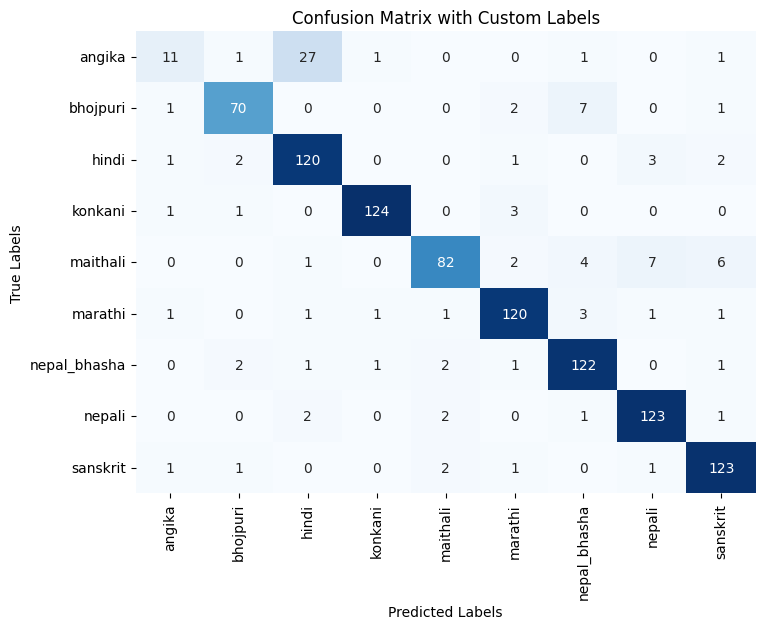

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data

# Define custom class labels
class_labels = ['angika', 'bhojpuri', 'hindi', 'konkani', 'maithali', 'marathi', 'nepal_bhasha', 'nepali', 'sanskrit']

# Create confusion matrix with custom labels
cm = confusion_matrix(df_test['class'].values, y_pred, labels=np.arange(len(class_labels)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Custom Labels')
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(df_test['class'].values, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, F1-Score
precision = precision_score(df_test['class'].values, y_pred, average='weighted')
recall = recall_score(df_test['class'].values, y_pred, average='weighted')
f1 = f1_score(df_test['class'].values, y_pred, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

# Classification Report
print('******')
print(classification_report(df_test['class'].values, y_pred))


Accuracy: 0.8950
Precision: 0.8925, Recall: 0.8950, F1-Score: 0.8883
******
              precision    recall  f1-score   support

           0       0.69      0.26      0.38        42
           1       0.91      0.86      0.89        81
           2       0.79      0.93      0.85       129
           3       0.98      0.96      0.97       129
           4       0.92      0.80      0.86       102
           5       0.92      0.93      0.93       129
           6       0.88      0.94      0.91       130
           7       0.91      0.95      0.93       129
           8       0.90      0.95      0.93       129

    accuracy                           0.90      1000
   macro avg       0.88      0.84      0.85      1000
weighted avg       0.89      0.90      0.89      1000



In [20]:
from sklearn.metrics import precision_recall_fscore_support

# Class-wise metrics
precision, recall, f1, _ = precision_recall_fscore_support(df_test['class'].values, y_pred, average=None)
class_labels = [f'Class {i}' for i in range(len(precision))]

# Create a DataFrame or plot directly
class_metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1}, index=class_labels)
print(class_metrics_df)


         Precision    Recall  F1-Score
Class 0   0.687500  0.261905  0.379310
Class 1   0.909091  0.864198  0.886076
Class 2   0.789474  0.930233  0.854093
Class 3   0.976378  0.961240  0.968750
Class 4   0.921348  0.803922  0.858639
Class 5   0.923077  0.930233  0.926641
Class 6   0.884058  0.938462  0.910448
Class 7   0.911111  0.953488  0.931818
Class 8   0.904412  0.953488  0.928302
